## Knowledge diffusion in malaria from machine learning

The plan here is to reproduce everything Siwo did and try and derive some more value from the data, including some visualizations. The main question we seek to answer is:
- How well has machine learning been adopted by Biologists?
- Compared with other fields, how well has machine learning been adopted?

In [1]:
from Bio import Entrez
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
Entrez.email = "calebkibet88@gmail.com"

In [3]:
other_tech = ['"DNA sequencing"', '"PCR"',
              '"ELISA"','"microarray"',
              '"Sanger sequencing"','"Nanopore sequencing"',
              '"GWAS"']

In [4]:
ml = ['"machine learning"','"neural networks"',
     '"support vector machine"',
     '"k-nearest neighbor"',
     '"linear regression"',
     '"random forests"',
     '"logistic regression"',
     '"convolutional neural networks"','"bayesian networks "']

## Download data Details from PubMed

Using the code below, we get to fetch the data we are interested which talks about malaria and the various machine learning models. 

In [5]:
# make a placeholder to store result from querying 
def get_count(disease,ml):
    df = pd.DataFrame(columns=["ML_algorithm", "Count", 'First_Paper','Latest_paper'])
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        
        handle_1 = Entrez.esummary(db="pubmed", id = kenyan_pubids[0])
        handle_2 = Entrez.esummary(db="pubmed", id = kenyan_pubids[-1])
        
        record_1 = Entrez.read(handle_1)
        record_2 = Entrez.read(handle_2)
        # see what we are capable of subsetting
        
        df.loc[len(df)]= [machine.replace('"',''), len(kenyan_pubids), record_2[0]["PubDate"],record_1[0]["PubDate"]]
        
    #df.to_csv()
    return df
        

In [6]:
cancer_df = get_count("cancer",ml)
cancer_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,3121,1990 Oct,2019 May
1,neural networks,2499,1989 May,2019 Apr 25
2,support vector machine,1976,2000 Oct,2019 Apr 25
3,k-nearest neighbor,292,1992 Jun,2019 Mar
4,linear regression,7912,1975 Jun,2019 May 2
5,random forests,214,2003 Apr 1,2019 May
6,logistic regression,41445,1976,2019 May 3
7,convolutional neural networks,271,2013,2019 Apr
8,bayesian networks,127,1995,2019 Apr 30


In [7]:
malaria_df = get_count("malaria",ml)
malaria_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,75,2008 Apr 16,2019 Apr 30
1,neural networks,31,2001,2019 Mar 27
2,support vector machine,21,2008 Feb 15,2019 Mar
3,k-nearest neighbor,7,2010 Mar,2019 Apr 1
4,linear regression,220,1983 Dec,2019
5,random forests,6,2013 Feb 11,2018 Feb 14
6,logistic regression,1022,1987 Oct,2019 Apr 26
7,convolutional neural networks,3,2018,2018 Sep 25
8,bayesian networks,3,2015 Aug 28,2018 Jan


In [8]:
other_tech_cancer = get_count("cancer",other_tech)
other_tech_cancer

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,5553,1978 Jun 27,2019 Mar 13
1,PCR,105318,1978 Mar,2019 May 3
2,ELISA,20679,1978,2019 May 2
3,microarray,32592,1953 Jan,2019 May 2
4,Sanger sequencing,1954,1995 Feb,2019 May 2
5,Nanopore sequencing,32,2013 Jan,2019 Apr 25
6,GWAS,2229,1997 Feb,2019 May 1


In [9]:
other_tech_malaria = get_count("malaria",other_tech)
other_tech_malaria

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,189,1988 Feb,2019 Apr 29
1,PCR,4303,1983 Dec,2019 May 2
2,ELISA,1779,1976,2019 May 1
3,microarray,357,2000 Jan,2019 Mar 27
4,Sanger sequencing,29,2012 May,2019 Apr 18
5,Nanopore sequencing,1,2018 May 29,2018 May 29
6,GWAS,32,2008 Jul 1,2018 Dec 4


In [10]:
tuberculosis_df = get_count("tuberculosis",ml)
tuberculosis_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,105,2002 Feb,2019 Apr 12
1,neural networks,77,1994 Mar,2019 Apr 12
2,support vector machine,49,2006 Jan-Feb,2019
3,k-nearest neighbor,6,1994 Mar,2015 Dec
4,linear regression,298,1976,2019 Apr 22
5,random forests,3,2004 Sep 28,2016 Nov 1
6,logistic regression,2311,1981 Jul,2019 Apr 12
7,convolutional neural networks,8,2017 Aug,2019 Apr 18
8,bayesian networks,3,2004 Mar,2014


In [11]:
other_tech_tb = get_count("tuberculosis",other_tech)
other_tech_tb

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,506,1988 Apr,2019 Mar
1,PCR,5746,1990-1991,2019 May 1
2,ELISA,2252,1976 Mar,2019 Apr 23
3,microarray,540,1950 Nov 18,2017 Mar
4,Sanger sequencing,61,2010 Jul,2019
5,Nanopore sequencing,3,2015 Dec 21,2016 Sep
6,GWAS,47,2011 Mar,2019 Apr 18


Now we can clean the dataframes to include delay details and the year of First Publication

In [12]:
def clean_df(df,disease):
    df['date'] = pd.to_datetime(df['First_Paper'], errors='coerce')
    df['year_%s' % disease] = df.date.dt.year
    df  = df[['ML_algorithm','Count','year_%s' % disease]]
    df.columns = ['ML_algorithm','%s_Count' % disease,'year_%s' % disease]
    
    return df

In [13]:
malaria_clean = clean_df(malaria_df,'malaria')
malaria_clean

,ML_algorithm,malaria_Count,year_malaria
0,machine learning,75,2008
1,neural networks,31,2001
2,support vector machine,21,2008
3,k-nearest neighbor,7,2010
4,linear regression,220,1983
5,random forests,6,2013
6,logistic regression,1022,1987
7,convolutional neural networks,3,2018
8,bayesian networks,3,2015


In [14]:
cancer_clean = clean_df(cancer_df,'cancer')
cancer_clean

,ML_algorithm,cancer_Count,year_cancer
0,machine learning,3121,1990
1,neural networks,2499,1989
2,support vector machine,1976,2000
3,k-nearest neighbor,292,1992
4,linear regression,7912,1975
5,random forests,214,2003
6,logistic regression,41445,1976
7,convolutional neural networks,271,2013
8,bayesian networks,127,1995


In [15]:
def merge_data(df1,df2,disease1,disease2):
    """
    Ceates a merged dataframe of two diseases being compared
    with the delay in tech adoption in years
    """
    marged_data = pd.merge(df1, df2, on='ML_algorithm')
    marged_data['delay'] = marged_data['year_%s' % disease2] - marged_data['year_%s' % disease1]
    marged_data.set_index('ML_algorithm',inplace=True)
    return  marged_data

In [16]:
malaria_cancer_ml = merge_data(cancer_clean,malaria_clean,"cancer","malaria")

In [17]:
malaria_cancer_ml.delay.mean()

12.222222222222221

In [18]:
other_cancer = clean_df(other_tech_cancer,'cancer')
other_malaria = clean_df(other_tech_malaria,'malaria')

In [19]:
malaria_cancer_other = merge_data(other_cancer,other_malaria,"cancer","malaria")

In [20]:
malaria_cancer_other

,cancer_Count,year_cancer,malaria_Count,year_malaria,delay
ML_algorithm,,,,,
DNA sequencing,5553,1978,189,1988,10
PCR,105318,1978,4303,1983,5
ELISA,20679,1978,1779,1976,-2
microarray,32592,1953,357,2000,47
Sanger sequencing,1954,1995,29,2012,17
Nanopore sequencing,32,2013,1,2018,5
GWAS,2229,1997,32,2008,11


In [21]:
malaria_cancer_other.delay.mean()

13.285714285714286

The total number of papers in PubMed mentioning cancer are 3836105

In [22]:
handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="cancer")
kenyan_records = Entrez.read(handle)
cancer_total = len(kenyan_records["IdList"])
cancer_total

3853737

While for malaria, we have 90885 papers in PubMed

In [23]:
handle = Entrez.esearch(db = "pubmed", retmax=100000, term="malaria")
kenyan_records = Entrez.read(handle)
malaria_total = len(kenyan_records["IdList"])
malaria_total

91246

### Download paper details for additional analysis
With that captured, we can now check for the number of papers published for the popular machine learning algorithms for malaria research. We will use this data to observe the trends in the adoption of various algorithms

In [24]:
def get_paper_details(ml,disease):
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=100000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        write_paper = "_".join(machine.split()) +"_paper.txt"
        Main_df = pd.DataFrame()
        for pubid in kenyan_pubids:
            #retrieve paper abstracts so that we can extract additional information, like country
            #paper_retriever(pubid, "calebkibet88@gmail.com", "Data/%s/abstracts/%s" % (disease,write_paper.replace('"','')))
            test= Entrez.read(Entrez.esummary(db = "pubmed", id = pubid))
            df2 = pd.DataFrame(test)
            Main_df = pd.concat([Main_df,df2])

        Cleaned_Main_df = Main_df[['Id', 'ArticleIds', 'AuthorList', 'DOI' ,
               'FullJournalName', 'HasAbstract', 'LastAuthor', 'NlmUniqueID',
               'PubDate', 'PubTypeList', 'RecordStatus', 'Source', 'Title']]
        out_file = "_".join(machine.split())+".txt"
        Cleaned_Main_df.to_csv("Data/%s/metadata/%s" % (disease,out_file.replace('"','')), sep='\t', index=False)
    

In [36]:
get_paper_details(ml,'malaria')

In [39]:
get_paper_details(ml,'cancer')

Next, we write a function to retrieve abstract and metadata, which we get to use later to extract important information. 

In [40]:
def paper_retriever(pubmedid, email, output_file):
    '''The paper retriever function takes your email which uses the same name email as an 
    argument, pubmedid you can get this from the previous function, searchterm take the NCBI type of query as a string
    and renamefile just changing your file names to avoid confusion.
    
    Return the full paper depending on if it's open access or not.
    '''
    
    # Enter your own email
    Entrez.email = email
    
    # the method efetch does and fetches the information you need brings it back to your Ipython session
    handle2 = Entrez.efetch(db="pubmed", id = pubmedid, rettype="gb",retmode="text")
    
    # using cell magic in a function in the jupyter notebook
    with open(output_file, 'a') as paper_data:
        paper_data.write(handle2.read())



In [41]:
def parseAbstracts(infile,outfile):
    with open(outfile,'w') as clean:
        with open(infile) as abstract:
            tag = False
            for line in abstract:
                if line[0].isdigit() and (
                    line[1:3] == '. ' or line[2:4] == '. ' or line[3:5] == '. '):
                    if tag:
                        continue
                    else:
                        try:
                            date = line.replace(
                                ';','.').replace(':','.').split('.')[2]
                            journal = line.replace(
                                ';','.').replace(':','.').split('.')[1]
                            tag = True
                        except IndexError:
                            print(line)
                            tag = False
                if tag and line.startswith('PMID:'):
                    pubid = line.split()[1]
                    tag=False
                    clean.write('%s\t%s\t%s\n' % (pubid, journal, date.strip()))

### Fetch Country details from Author Information
In this section, we are interested in extracting the author country information. We want to understand who is driving the adoption of machine learning approaches in malaria research. We use the affiliation of the first author or the most common country. First, we install `geograpy` using: 

`python3 -m pip install git+https://github.com/reach2ashish/geograpy.git`

However, python3 version of this tool does not work well, it seems to extract incorrect details. We then opted for an alternative, `pycountry`, which we use to check if a country name exists in the affiliation section of the paper. However, this tool does not consider abbreviations and alternative names. We have to manually test for UK and USA. 

In [27]:
#import geograpy

First we need to dowload the required nltk data

In [28]:
#import nltk

In [29]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/user/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Here is an the pycountry tool in action. 

In [30]:
import pycountry
texts = "United States (New York), United Kingdom (London)"
for country in pycountry.countries:
    if country.name.lower() in texts.lower():
        print(country.name)

United Kingdom
United States


In [31]:
p=geograpy.get_place_context(text=texts)
p.countries

['US Miscellaneous Pacific Islands',
 'New York',
 'United Kingdom',
 'London',
 'United States',
 'Canada',
 'South Africa']

As can be observed above, the geograpy tool does not give the correct information. Hence the need for an alternative. 

## Extract country details from paper metadata

With the downloaded data, we can attempt to extract country details from the Author information using the pycountry tool. For each article, we pass the author information to the tool which creates a list of all the countries in the text, in order of appearance in the text. We can assume the first will host information of the first author, where available. IEven if that's not the case, we expect the first item will be representative paper country affiliation. 

In [32]:
for machine in ml:
    write_paper = "_".join(machine.split()) +"_paper.txt"
    print(machine)
    with open("Data/Abstracts/"+write_paper) as abstract:
        tag = False
        search_text = ""
        for line in abstract:
            if line.startswith("Author information:"):
                tag = True
            if tag:
                if line != "\n":
                    search_text = search_text + line
                else:
                    #print(search_text)
                    tag = False
                    countries = []
                    for country in pycountry.countries:
                        if country.name.lower() in search_text.lower():
                            countries.append(country.name)
                    if "usa" in search_text.lower():
                        countries.append("United States")
                    if "UK" in search_text:
                        countries.append("United Kingdom")
                    if len(countries) == 0:
                        countries.append("Missing")
                    #print(countries)
                    search_text = ""
                    print(countries[0],end="\t")
                    #print(countries)
            if line.startswith('PMID:'):
                pubid = line.split()[1]
                print(pubid)
        #print(pubid,country)


"machine learning"
Australia	30963872
Japan	30917718
United Kingdom	30840746
India	30706823
United States	30637185
United States	30621144
Pakistan	30575213
United States	30504893
Burkina Faso	30376866
United Kingdom	30333748
Peru	30253764
United States	30240429
Australia	30212465
United Kingdom	30120591
Ghana	30005684
Poland	29985403
Burkina Faso	29954424
Switzerland	29760095
France	29749713
Bangladesh	29682411
Missing	29676064
United States	29642892
Australia	29588452
Austria	28928948
Switzerland	29407988
Thailand	29360430
Ecuador	29336158
India	29297620
Botswana	29277258
Georgia	29221545
Australia	29107642
Jersey	29096442
India	29075939
United Kingdom	29065113
Cameroon	29031082
Israel	28879175
Missing	28690382
Georgia	28542223
United States	28319831
India	28260517
Switzerland	28257198
India	27974542
Mozambique	27837008
United States	27636719
India	27490966
Belgium	27367660
India	27185931
India	27095535
United States	26994406
United States	26813983
Canada	26834994
China	26310492
Brazi

Ethiopia	29075500
China	29059184
Peru	29037202
Brazil	29033373
Georgia	29020386
Missing	29017588
Uganda	29016322
Belgium	29016317
Benin	28991911
Georgia	28990920
Ethiopia	28985734
Canada	28985421
Ethiopia	28969636
Malawi	28969632
South Africa	28968846
Cameroon	28962616
United States	28914186
Kenya	28903758
Canada	28903727
Brazil	28902263
Spain	28893263
Missing	28877733
Ethiopia	28870241
Georgia	28850631
Belgium	28829731
Namibia	28820883
Haiti	28818627
Ghana	28797296
Kenya	28787328
Belgium	28778210
United States	28764717
Australia	28758162
Sudan	28753649
Germany	28727775
Ethiopia	28716009
Côte d'Ivoire	28705498
Benin	28671987
Ethiopia	28668084
Australia	28637467
Australia	28633672
Canada	28615262
Canada	28615260
United States	28610579
United States	28571583
Norway	28558701
Ecuador	28552183
China	28526083
Sweden	28510633
Georgia	28500813
Burkina Faso	28454537
Australia	28449641
Ethiopia	28446847
Niger	28439418
United Kingdom	28431115
Uganda	28427415
Kenya	28427357
Portugal	28426116
India

United Kingdom	18000823
Sweden	17988171
Kenya	17950960
United States	17915520
India	17896621
South Africa	17892584
United States	17690391
Portugal	17665841
Malawi	17651488
Sweden	17620000
Denmark	17597460
Mexico	17589774
Kenya	17559638
France	17553228
United States	17550620
Kenya	17531102
Norway	17519011
Kenya	17445255
Malawi	17425775
Brazil	17343728
United States	17300188
Australia	17297026
Sweden	17280666
Colombia	17175998
United Kingdom	17125496
Kenya	17076908
Niger	17071423
United States	17033960
Sri Lanka	16967817
United States	16903878
South Africa	16901337
United States	16867194
Sweden	16862473
Ghana	16827703
France	16797467
United States	16772004
Niger	16749361
United Kingdom	16723143
United States	16716232
Germany	16704783
Missing	16629703
United States	16572713
Kenya	16525094
Spain	16460558
Niger	16448735
Kenya	16436216
United Kingdom	16423307
Ghana	16388497
Central African Republic	16313935
Kenya	16277654
United States	16271153
United States	16259531
Netherlands	16256049
Sri

In [203]:
c = pd.read_table('countries.txt')

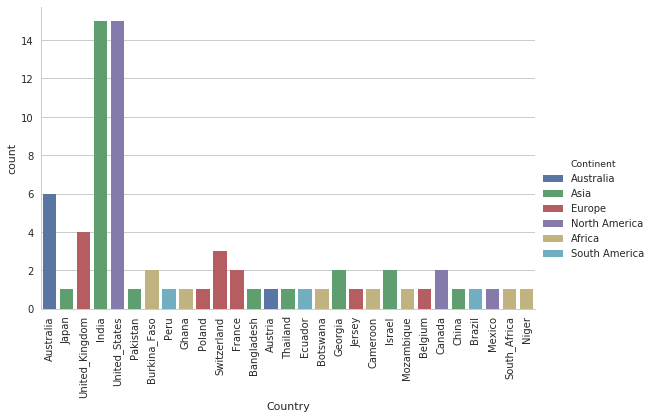

In [204]:
g = sns.factorplot(x="Country", kind="count", hue='Continent', data=c, orient='v', size=5, aspect=1.5,dodge=False)

g.set_xticklabels(rotation=90)

In [202]:
g.savefig('Plots/Country_continent.png')

From the above, we observe that lest basic machine learning techniques are widely used in malaria research, they are also being used by African researchers. Clearly, linear and logistic regression are widely used for identifying relationships between multiple factors for categorical and continuous variables, respectively. 

### TODO: 
- How can we quickly get statistics of African Countries in the list? 
- Do we need to catergorise Developed and LIC/LMIC? If so, how?

In [45]:
def convertDate(data):
    '''
    Given a dataframe, convert to date time and separate
    the date columns
    '''
    #data.set_index('Id', inplace=True)
    #### Conver the date column to date format
    data['date'] = pd.to_datetime(data['PubDate'], errors='coerce')
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    ### Save the data in a csv for future re-use
    #data.to_csv(outcsv,sep='\t')
    return data

### Data Analysis and Visualization

Here we perform quick plots to understand trends in machine learning diffusion to malaria research. 

In [47]:
for machine in ml:
    machine = machine.replace('"','')
    out_file = "_".join(machine.split())
    path = "Data/%s/metadata/%s.txt" % ('malaria',out_file)
    data = pd.read_table(path, index_col='Id')
    data = convertDate(data)
    data['year'].value_counts().sort_index().plot(kind='bar',
                                     title='Number of Papers talking about malaria and %s Per Year'% machine,
                                                  figsize=(8, 6))
    plt.savefig('Plots/malaria_%s.png' % out_file)
    plt.clf()

<Figure size 576x432 with 0 Axes>

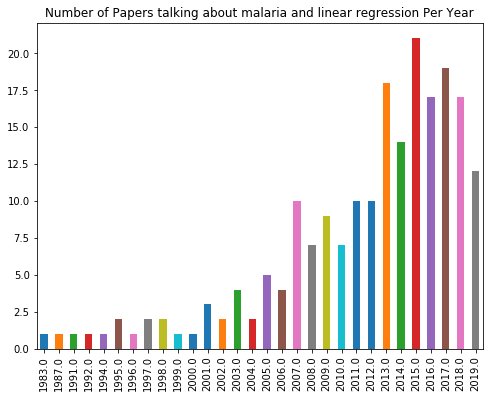

In [48]:
machine = "linear regression"
machine = machine.replace('"','')
out_file = "_".join(machine.split())
path = "Data/%s/metadata/%s.txt" % ('malaria',out_file)
data = pd.read_table(path, index_col='Id')
data = convertDate(data)
data['year'].value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers talking about malaria and %s Per Year'% machine,
                                              figsize=(8, 6))
plt.savefig('Plots/malaria_%s.png' % out_file)

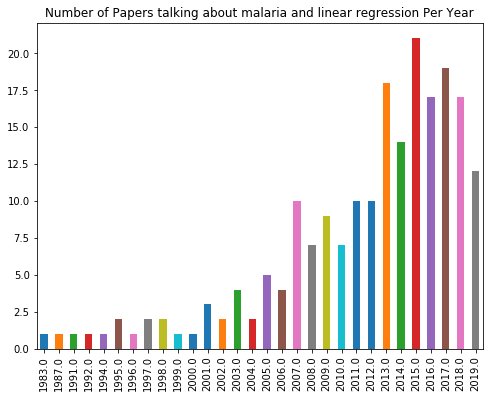

In [50]:
machine = "linear regression"
machine = machine.replace('"','')
out_file = "_".join(machine.split())
path = "Data/%s/metadata/%s.txt" % ('malaria',out_file)
data = pd.read_table(path, index_col='Id')
data = convertDate(data)
data['year'].value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers talking about malaria and %s Per Year'% machine,
                                              figsize=(8, 6))
plt.savefig('Plots/malaria_%s.png' % out_file)

The above quick analysis seems to show that the algorithms popularity may have peeked in 2015, but have been on the decline ever since. We need to investigat this further. 